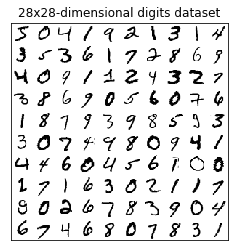

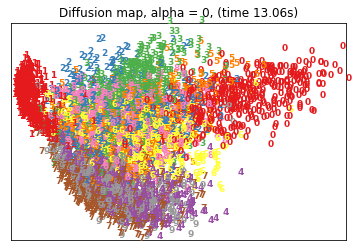

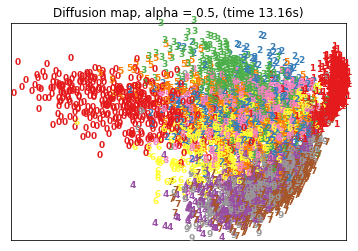

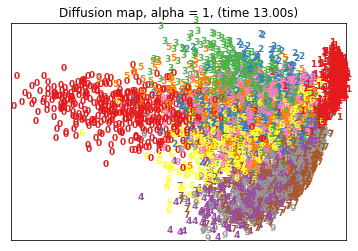

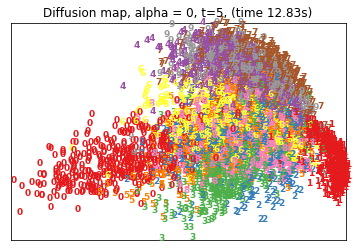

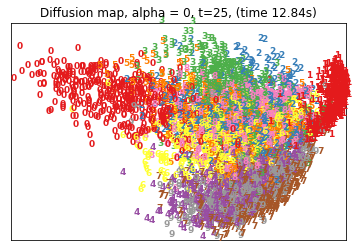

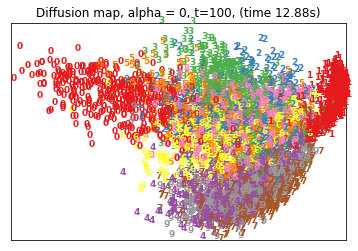

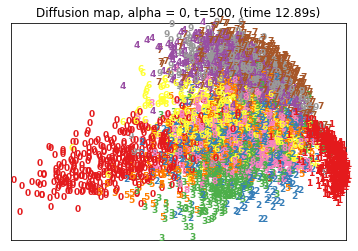

In [1]:
import numpy as np
import time
from time import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import tensorflow as tf
from mapalign.mapalign.embed import DiffusionMapEmbedding
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cluster import KMeans

# Scale and visualize the embedding vectors
def plot_embedding(X,Y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(Y[i]),
                 color=plt.cm.Set1(Y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# Load data and Preprocessing
mnist = tf.contrib.keras.datasets.mnist
(X_train, train_lbl), (X_test, test_lbl) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
n_pixels = np.prod(X_train.shape[1:])
train_img = X_train.reshape(X_train.shape[0], n_pixels).astype(np.float32)
test_img = X_test.reshape(X_test.shape[0], n_pixels).astype(np.float32)


# Plot images of the digits
n_img_per_row = 10
img = np.zeros((30 * n_img_per_row, 30 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 30 * i + 1
    for j in range(n_img_per_row):
        iy = 30 * j + 1
        img[ix:ix + 28, iy:iy + 28] = X_train[i * n_img_per_row + j].reshape((28, 28))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('28x28-dimensional digits dataset')

train_temp = train_img[0:5000]
lbl_temp = train_lbl[0:5000]
# PCA
# t0 = time()
# X_pca = PCA(n_components=2).fit_transform(train_temp)
# plot_embedding(X_pca,lbl_temp, "Principal Components projection of the digits (time %.2fs)" %(time() - t0))

#LLE
# n_neighbors = 35
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard')
# t0 = time()
# X_lle = clf.fit_transform(train_temp)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_lle,lbl_temp,"Locally Linear Embedding of the digits (time %.2fs)" %(time() - t0))

# Diffusion Maps
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0, diffusion_time=0, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0, (time %.2fs)" %(time() - t0))
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0.5, diffusion_time=0, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0.5, (time %.2fs)" %(time() - t0))
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=1, diffusion_time=0, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 1, (time %.2fs)" %(time() - t0))

t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0, diffusion_time=5, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0, t=5, (time %.2fs)" %(time() - t0))
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0, diffusion_time=25, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0, t=25, (time %.2fs)" %(time() - t0))
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0, diffusion_time=100, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0, t=100, (time %.2fs)" %(time() - t0))
t0 = time()
X_diff = DiffusionMapEmbedding(alpha=0, diffusion_time=150, affinity='markov',n_components=10).fit_transform(train_temp.copy())
plot_embedding(X_diff,lbl_temp, "Diffusion map, alpha = 0, t=500, (time %.2fs)" %(time() - t0))

plt.show()

In [2]:
# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(train_temp)
plot_embedding(X_tsne,lbl_temp, "t-SNE embedding of the digits (time %.2fs)" %(time() - t0))


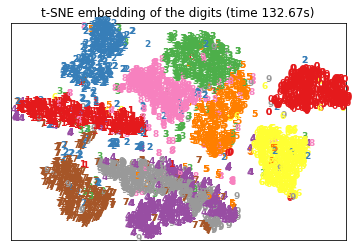

In [3]:
plt.show()